In [ ]:
include("src\\ImportanceSamplers.jl")
using ImportanceSamplers
using Distributions
using Seaborn

In [62]:
d1 = MixtureDistribution([Normal(0.0), Cauchy(50), Laplace(-50)], [0.5, 3, 4])
d2 = MixtureDistribution([Poisson(1), Poisson(16)], [3, 10])
d3 = MixtureDistribution([Exponential(1), Exponential(2)], [3, 4])

d4 = MixtureDistribution([MvNormal([16.0, 16], eye(2)*3), MvTDist(6.0, [-16, -16.0], eye(2)*3)], [2, 8])

d5 = MixtureDistribution([Wishart(3, eye(2)), InverseWishart(60, [1000 5.0; 5 2016]), Wishart(3000, eye(2)*20)])
;

In [ ]:
mean.(d4.c)

In [9]:
wis = Wishart(20, eye(2))
x = eye(2)*3 + randn(2,2)
x = x*x'

(pdf(MixtureDistribution([wis, wis], [2, 20]), x) - pdf(wis, x),
    logpdf(MixtureDistribution([wis, wis], [2, 20]), x) - logpdf(wis, x))

(0.0, 0.0)

In [10]:
mvn = MvNormal(eye(2))
x = randn(2,6)

(pdf(MixtureDistribution([mvn, mvn], [2, 20]), x) - pdf(mvn, x),
    logpdf(MixtureDistribution([mvn, mvn], [2, 20]), x) - logpdf(mvn, x))

([0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

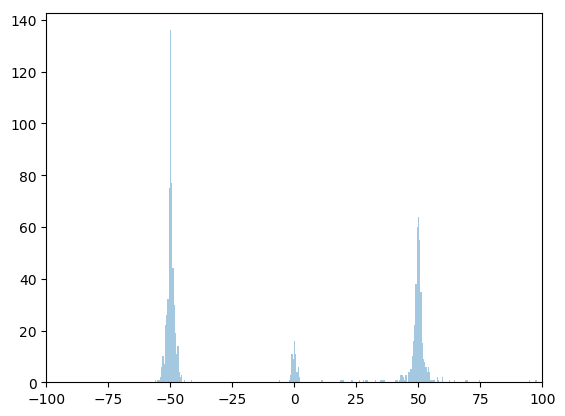

In [60]:
xs = rand(d1, 1_000)
distplot(xs, kde=false, bins=500)
xlim(-100,100)
;

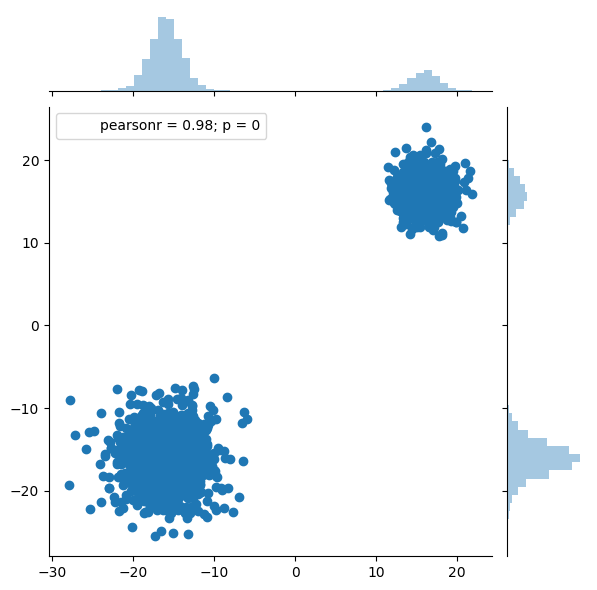

In [64]:
xs = rand(d4, 5000)
jointplot(xs[1,:], xs[2,:])
;